#**RでYahoo! finance (USA)を利用する**

このColabノートブックでは、ライブラリquantmodを使って、Yahoo! finance (USA)を利用する方法を説明します。quantmodを使うと、Yahoo! finance (USA)の株価データを簡単にダウンロードして利用できます。

公式サイト：<br>http://www.quantmod.com/examples/intro/
<br>
<br>
なお、このノートブックは「[Rの第一歩](https://colab.research.google.com/github/koiti-yano/colab/blob/main/経済統計_R入門_1_basic.ipynb)」をすでに読んでいることを前提にしています。

> 注意：Yahoo!ファイナンス (Japan)は、スクレイピング（getSymbols等を使ってデータをダウンロードすること）を禁止しているため使用しないでください。Yahoo!ファイナンス (Japan)はtickerを調べるときだけ使用します。Yahoo! finance (USA)ではスクレイピングは禁止されていないようです。

In [2]:
# ライブラリquantmodをインストールします。最初に少し時間がかかります
install.packages("quantmod")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
# 最初に必要なライブラリを読み込みます
rm(list=ls())
library(quantmod)
library(dplyr)
library(ggplot2)

最初にデータを取得する期間を指定します。start.dateが開始時期、end.dateが終了時期（end.date）で、"西暦-月-日"というフォーマットで書きます。たとえば、"2021-1-1"は2021年1月1日です。また、Sys.Date()は今日の日付を出力する関数です。



In [5]:
# 開始時期を2021年1月1日、終了時期を今日にします。
start.date <- "2021-1-1"
end.date <- Sys.Date()


実際にデータ取得します。tickerには取得したいデータの略称を代入します。

たとえば、日経平均（日経225平均株価指数）はN225、博報堂は2433.T、電通は4324.T、マルハニチロは1333.T、円ドル為替レートはJPY=Xです。これらのtickerはGoogleで検索すると分かります。

In [10]:
# 日経平均=^N225
ticker <-  c("^N225")
nikkei225 <- getSymbols(ticker, src = "yahoo", 
from = start.date, to = end.date, auto.assign = FALSE)

# 博報堂=2433.T
ticker <-  c("2433.T")
haku <- getSymbols(ticker, src = "yahoo", 
from = start.date, to = end.date, auto.assign = FALSE)

# 電通=4324.T
ticker <-  c("4324.T")
dentsu <- getSymbols(ticker, src = "yahoo", 
from = start.date, to = end.date, auto.assign = FALSE)

# マルハニチロ=1333.T
ticker <-  c("1333.T")
maruha <- getSymbols(ticker, src = "yahoo", 
from = start.date, to = end.date, auto.assign = FALSE)

# 円ドルレート
ticker <-  c("JPY=X")
yenDollar <- getSymbols(ticker, src = "yahoo", 
from = start.date, to = end.date, auto.assign = FALSE)


tail()関数を使って、データがきちんと取得できているか確認します。

In [7]:
#rm(list=ls())
nikkei225 %>% tail()
haku %>% tail()
dentsu %>% tail()
maruha %>% tail()
yenDollar %>% tail()


           N225.Open N225.High N225.Low N225.Close N225.Volume N225.Adjusted
2021-08-05  27526.67  27741.55 27526.67   27728.12    55900000      27728.12
2021-08-06  27709.22  27888.87 27709.22   27820.04    56400000      27820.04
2021-08-10  27887.03  28128.61 27808.54   27888.15    61400000      27888.15
2021-08-11  28045.84  28146.68 27974.99   28070.51    67100000      28070.51
2021-08-12  28177.20  28279.80 28006.31   28015.02    57900000      28015.02
2021-08-13  28038.96  28070.00 27949.33   27977.15           0      27977.15

           2433.T.Open 2433.T.High 2433.T.Low 2433.T.Close 2433.T.Volume
2021-08-05        1765        1771       1731         1746        365100
2021-08-06        1775        1819       1764         1792        836700
2021-08-10        1807        1833       1775         1779        687100
2021-08-11        1810        1810       1764         1772        461000
2021-08-12        1796        1816       1775         1780        283500
2021-08-13        1778        1785       1755         1757        322100
           2433.T.Adjusted
2021-08-05            1746
2021-08-06            1792
2021-08-10            1779
2021-08-11            1772
2021-08-12            1780
2021-08-13            1757

           4324.T.Open 4324.T.High 4324.T.Low 4324.T.Close 4324.T.Volume
2021-08-05        3865        3915       3865         3910        542300
2021-08-06        3910        3990       3895         3985       1000300
2021-08-10        3995        4060       3985         4055       1347800
2021-08-11        4065        4095       4020         4080       1230400
2021-08-12        4150        4360       4120         4285       3333800
2021-08-13        4330        4330       4165         4185       1650200
           4324.T.Adjusted
2021-08-05            3910
2021-08-06            3985
2021-08-10            4055
2021-08-11            4080
2021-08-12            4285
2021-08-13            4185

           1333.T.Open 1333.T.High 1333.T.Low 1333.T.Close 1333.T.Volume
2021-08-05        2400        2433       2395         2430        108000
2021-08-06        2432        2447       2420         2434        134800
2021-08-10        2438        2465       2420         2422        229800
2021-08-11        2498        2524       2457         2458        321500
2021-08-12        2445        2461       2392         2392        365800
2021-08-13        2370        2398       2362         2390        262100
           1333.T.Adjusted
2021-08-05            2430
2021-08-06            2434
2021-08-10            2422
2021-08-11            2458
2021-08-12            2392
2021-08-13            2390

           JPY=X.Open JPY=X.High JPY=X.Low JPY=X.Close JPY=X.Volume
2021-08-06    109.751    110.345   109.702     109.752            0
2021-08-09    110.261    110.311   110.028     110.259            0
2021-08-10    110.318    110.586   110.303     110.306            0
2021-08-11    110.599    110.803   110.387     110.598            0
2021-08-12    110.365    110.526   110.316     110.374            0
2021-08-13    110.430    110.458   110.130     110.187            0
           JPY=X.Adjusted
2021-08-06        109.752
2021-08-09        110.259
2021-08-10        110.306
2021-08-11        110.598
2021-08-12        110.374
2021-08-13        110.187

quantmodにはchartSeries()という株価をグラフにしてくれる関数があるので、ちょっと使ってみましょう（単にグラフにするだけならこのchartSeries()で十分です）。

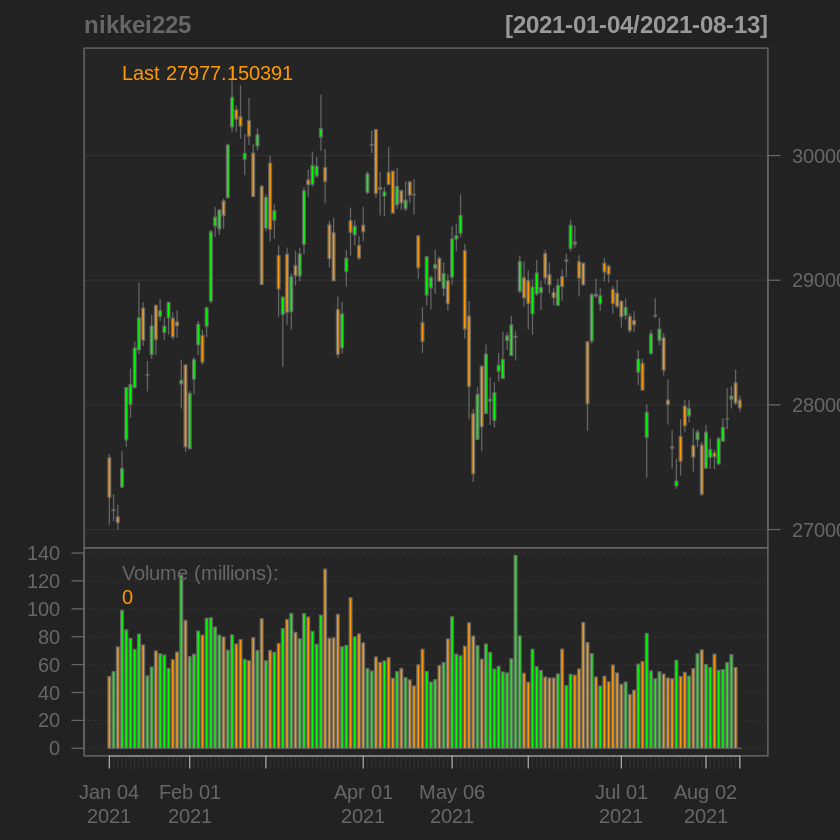

In [11]:
chartSeries(nikkei225)

次に対数差分（値を対数に変換して、差分を取る）を計算します。たとえば、nikkeiDailyReturn100は日経平均の日次収益率（％表示）です。対数差分は変化率の近似として使うことができます。

補足：対数差分が変化率の近似になるというのは便利なテクニックなので、覚えておくといいでしょう。

In [12]:
nikkei225$N225.Close %>% log() %>% diff() -> nikkeiDailyReturn
nikkeiDailyReturn100 <- nikkeiDailyReturn * 100

haku[,"2433.T.Close"]  %>% log() %>% diff() -> hakuDailyReturn
hakuDailyReturn100 <- hakuDailyReturn * 100

dentsu[,"4324.T.Close"]  %>% log() %>% diff() -> dentsuDailyReturn
dentsuDailyReturn100 <- dentsuDailyReturn * 100

maruha[,"1333.T.Close"]  %>% log() %>% diff() -> maruhaDailyReturn
maruhaDailyReturn100 <- maruhaDailyReturn * 100

yenDollar[,"JPY=X.Close"]  %>% log() %>% diff() -> ydDailyReturn
ydDailyReturn * 100 -> ydDailyReturn100 


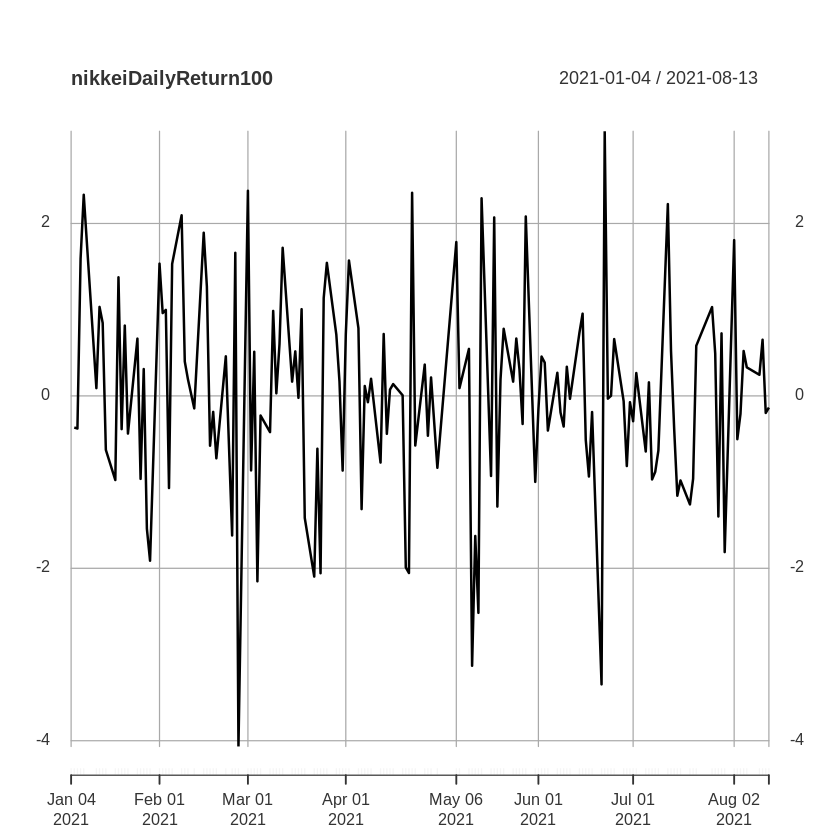

In [13]:
plot(nikkeiDailyReturn100)

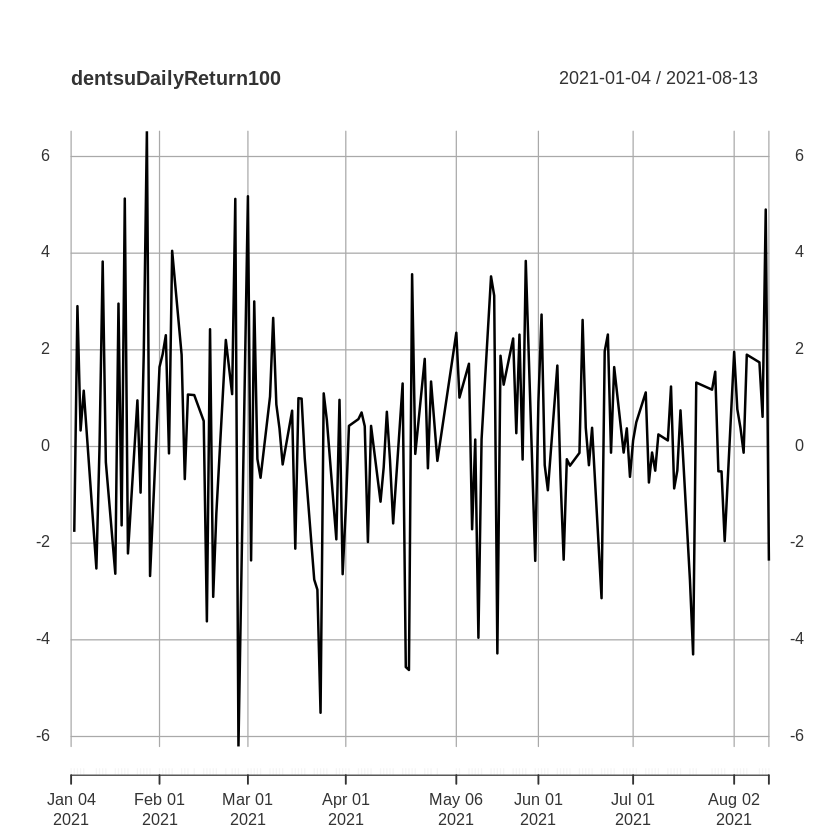

In [14]:
plot(dentsuDailyReturn100)

In [15]:
lm(hakuDailyReturn100 ~ maruhaDailyReturn100) %>% summary()


Call:
lm(formula = hakuDailyReturn100 ~ maruhaDailyReturn100)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9574 -1.0985 -0.2084  1.0759  6.1904 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.1240     0.1488   0.833    0.406    
maruhaDailyReturn100   0.6573     0.1051   6.256 4.08e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.815 on 147 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2103,	Adjusted R-squared:  0.2049 
F-statistic: 39.14 on 1 and 147 DF,  p-value: 4.08e-09


In [16]:
lm(hakuDailyReturn100 ~ dentsuDailyReturn100) %>% summary()


Call:
lm(formula = hakuDailyReturn100 ~ dentsuDailyReturn100)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0505 -1.0748 -0.0633  0.9526  5.9961 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.01128    0.12206   0.092    0.926    
dentsuDailyReturn100  0.64745    0.05626  11.508   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.482 on 147 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.474,	Adjusted R-squared:  0.4704 
F-statistic: 132.4 on 1 and 147 DF,  p-value: < 2.2e-16


In [17]:
lm(hakuDailyReturn100 ~ nikkeiDailyReturn100) %>% summary()


Call:
lm(formula = hakuDailyReturn100 ~ nikkeiDailyReturn100)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1100 -1.1071 -0.1252  0.8171  6.5335 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.1421     0.1337   1.063     0.29    
nikkeiDailyReturn100   1.0318     0.1131   9.121 5.23e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.632 on 147 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.3614,	Adjusted R-squared:  0.357 
F-statistic: 83.19 on 1 and 147 DF,  p-value: 5.23e-16


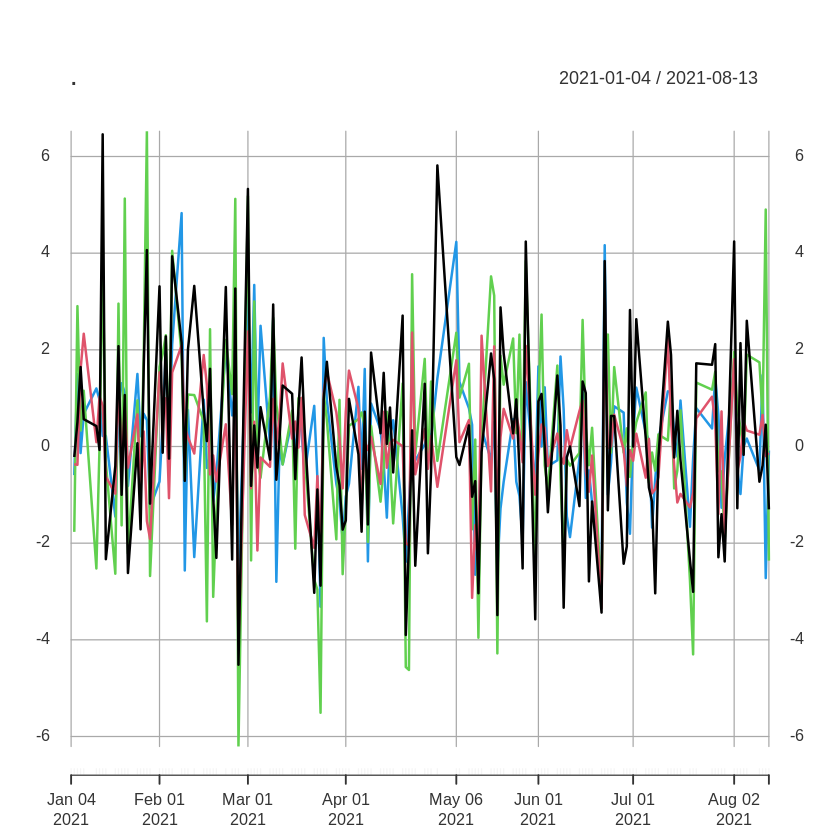

In [18]:
cbind(hakuDailyReturn100, nikkeiDailyReturn100, dentsuDailyReturn100, maruhaDailyReturn100) -> dataSet
dataSet %>% plot()
#https://stackoverflow.com/questions/8979241/can-i-write-an-xts-object-using-write-csv-in-r
write.zoo(dataSet, file="経済統計a_13_dataset.csv", sep=",")
#write.csv(dataSet, file="経済統計a_13_dataset.csv")


In [19]:
is.xts(hakuDailyReturn100)
# Lengthes are different.
#length(ydDailyReturn100)
#length(hakuDailyReturn100)
#lm(hakuDailyReturn100 ~ ydDailyReturn100) %>% summary()

[1] TRUE